This finance data project will focus on exploratory data analysis of 6 Bank stock prices.

In [1]:
#Import dependencies 
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
import cufflinks as cf
cf.go_offline()

%matplotlib inline

In [2]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

In [3]:
#Create a dataframe and read in the data using read_pickle
all_banks_df = pd.read_pickle('all_banks')

In [4]:
#Create a separate dataframe for each separate bank stock. 
BAC = all_banks_df['BAC']

C = all_banks_df['C']

GS = all_banks_df['GS']

JPM = all_banks_df['JPM']

MS = all_banks_df['MS']

WFC = all_banks_df['WFC']


In [5]:
#Take a look at the head of the data 
all_banks_df.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

In [6]:
#Create a tickers list 
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [8]:
#Using a for loop to see the highest close price for each stock. 
for tick in tickers:
    print(tick,all_banks_df[tick]['Close'].max())

BAC 54.9
C 564.1
GS 247.92
JPM 70.08
MS 89.3
WFC 58.52


In [9]:
#Can do the same thing as the for loop above in one line with the .xs() method. 
all_banks_df.xs(key='Close', axis=1, level='Stock Info').max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

Created a new empty dataframe called returns_df and this dataframe contains the return's for each stock. 
Returns = $$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [10]:
#Create an empty Dataframe
returns_df = pd.DataFrame()

In [11]:
#Create a for loop that creates a return column and set it 
#as a column in returns Dataframe. Use pandas pct_change method. 
for tick in tickers:
    returns_df[tick+ 'Return']= all_banks_df[tick]['Close'].pct_change()

In [12]:
returns_df.head()

,BACReturn,CReturn,GSReturn,JPMReturn,MSReturn,WFCReturn
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


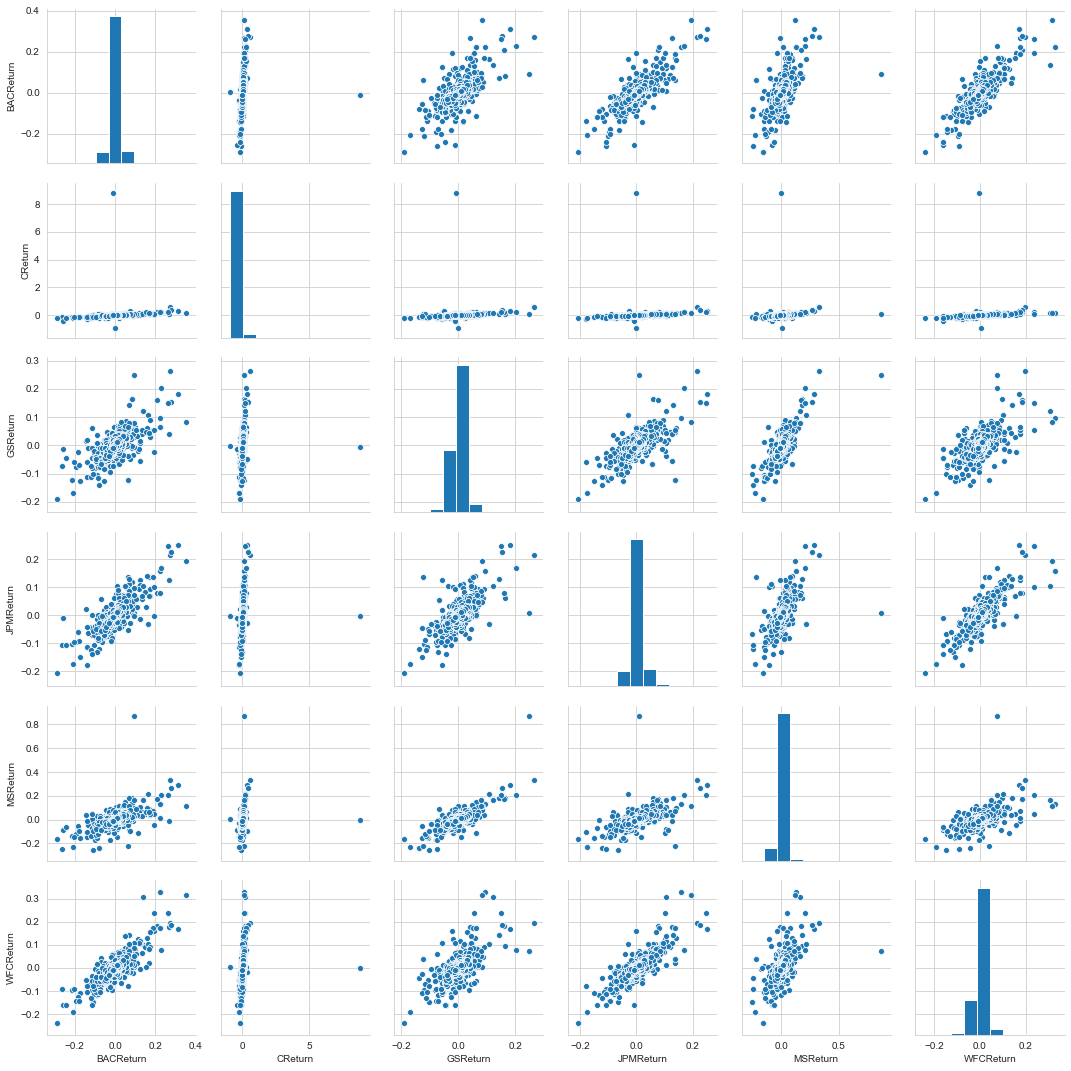

In [13]:
#Create a pairplot of the returns dataframe. 
sns.pairplot(returns_df[1:])

We see that there is unusual behavior in the returns of Citigroup as correlation is straight up. This indicates that somewhere in the data there was a severe crash in stock price. 

In [14]:
#Look at the day that the lowest returns of the bank stocks. Since they 
#are all in the same sector the days should be around the same day. 
returns_df.idxmin()

BACReturn   2009-01-20
CReturn     2011-05-06
GSReturn    2009-01-20
JPMReturn   2009-01-20
MSReturn    2008-10-09
WFCReturn   2009-01-20
dtype: datetime64[ns]

We notice that 4/6 bank stocks have the same day. If you look up that specific date, you will see that it was the date of Barack Obama's inauguration. Investors tend to make a move around political changes. This change happened to be a sell off of these bank stocks. 

In [15]:
#Look at the day of the highest returns of bank stocks. 
returns_df.idxmax()

BACReturn   2009-04-09
CReturn     2011-05-09
GSReturn    2008-11-24
JPMReturn   2009-01-21
MSReturn    2008-10-13
WFCReturn   2008-07-16
dtype: datetime64[ns]

For this particular data, we can see that Citigroup's largest drop and largest return were only 3 days apart. 

A basic measurement of stock volatility is standard deviation, which is a 
risk measure. Higher the standard deviation the more risk associated with that stock.

In [16]:
#Calculate the standard deviation of returns_df.  
returns_df.std()

BACReturn    0.036650
CReturn      0.179969
GSReturn     0.025346
JPMReturn    0.027656
MSReturn     0.037820
WFCReturn    0.030233
dtype: float64

With the standard deviation scores above, we can infer that Citigroup is by far the riskiest stock during this time period. This large difference between stocks in the same sector indicates that a severe event happened to this company during this time period. 

In [17]:
#Calculate the standard deviation from a smaller time period that doesn't 
#include severe event.
returns_df.ix['2015-01-01':'2015-12-31'].std()

C:\Users\seand\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



BACReturn    0.016163
CReturn      0.015289
GSReturn     0.014046
JPMReturn    0.014017
MSReturn     0.016249
WFCReturn    0.012591
dtype: float64

Citigroup's riskiness is much lower during this time period. All stocks have around the same standard deviation with Morgan Stanley and Bank of America being the riskiest during this time period. 

Now I am going to look at the distribution of the riskiest stock in 2015, which is Morgan Stanley. 

C:\Users\seand\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



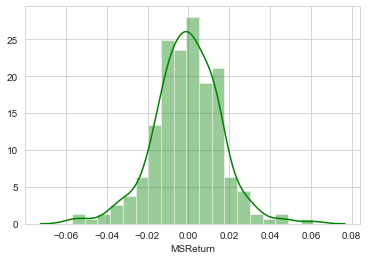

In [18]:
#Create a displot of the 2015 returns of Morgan Stanley
sns.distplot(returns_df.ix['2015-01-01':'2015-12-31']['MSReturn'], color='green')

Next, we look at the distribution of Citigroup's returns in 2008. The year that there a severe price crash for Citigroup's stock. 

C:\Users\seand\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



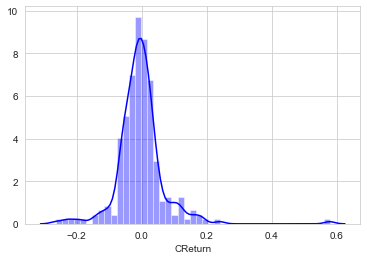

In [19]:
#Create a distplot for the 2008 returns for Citigroup. I will
#make this one blue instead of green.
sns.distplot(returns_df.ix['2008-01-01':'2008-12-31']['CReturn'], color='blue')